## 实现混淆矩阵、精准率和召回率

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# 引入手写识别数字数据集
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

# 为了让数据集变成二分类问题，做如下处理
y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
# 这里的 solver='liblinear' 是因为 https://blog.csdn.net/linzhjbtx/article/details/85331200
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9755555555555555

In [5]:
y_log_predict = log_reg.predict(X_test)

In [6]:
#TN
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))
TN(y_test, y_log_predict)

397

In [7]:
# FP
def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))
FP(y_test, y_log_predict)

5

In [8]:
# FN
def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))
FN(y_test, y_log_predict)

6

In [9]:
# TP
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))
TP(y_test, y_log_predict)

42

In [10]:
# 混淆矩阵
def confusion_matrix(y_true, y_predict):
    return np.array([
        [TN(y_true, y_predict), FP(y_true, y_predict)],
        [FN(y_true, y_predict), TP(y_true, y_predict)]
    ])
confusion_matrix(y_test, y_log_predict)

array([[397,   5],
       [  6,  42]])

In [11]:
# 精准率
def precision_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fp = FP(y_true, y_predict)
    try:
        return tp / (tp + fp)
    except:
        return 0.0   
precision_score(y_test, y_log_predict)

0.8936170212765957

In [12]:
# 召回率
def recall_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fn = FN(y_true, y_predict)
    try:
        return tp / (tp + fn)
    except:
        return 0.0
recall_score(y_test, y_log_predict)

0.875

### 使用 Scikit-learn 实现

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_log_predict)

array([[397,   5],
       [  6,  42]], dtype=int64)

In [14]:
from sklearn.metrics import precision_score
precision_score(y_test, y_log_predict)

0.8936170212765957

In [15]:
from sklearn.metrics import recall_score
recall_score(y_test, y_log_predict)

0.875

## F1 Score

In [16]:
def f1_score(precesion, recall):
    try:
        return 2 * precision * recall / (precision + recall)
    except:
        return 0.0

In [17]:
precision = 0.5
recall = 0.5
f1_score(precision, recall)

0.5

In [18]:
precision = 0.1
recall = 0.9
f1_score(precision, recall)

0.18000000000000002

In [19]:
precision = 0.0
recall = 1.0
f1_score(precision, recall)

0.0

### 使用 Scikit-learn 实现

In [20]:
from sklearn.metrics import f1_score
f1_score(y_test, y_log_predict)

0.8842105263157894

## Precision-recall 的平衡
Scikit-learn 不允许直接设置阈值，但可以访问它用于预测的决策分数。不是调用分类器的 predict() 方法，而是调用 decision_function() 方法，这个方法返回每个实例的分数，然后就可以根据这些分数，使用任意阈值进行预测了：

In [21]:
decision_scores = log_reg.decision_function(X_test)

In [22]:
np.min(decision_scores)

-61.02813630853092

In [23]:
np.max(decision_scores)

17.504275181503946

In [24]:
y_predict_2 = np.array(decision_scores >= 5, dtype='int')
confusion_matrix(y_test, y_predict_2)

array([[402,   0],
       [ 20,  28]], dtype=int64)

In [25]:
precision_score(y_test, y_predict_2)

1.0

In [26]:
recall_score(y_test, y_predict_2)

0.5833333333333334

In [27]:
y_predict_3 = np.array(decision_scores >= -5, dtype='int')
confusion_matrix(y_test, y_predict_3)

array([[379,  23],
       [  2,  46]], dtype=int64)

In [28]:
precision_score(y_test, y_predict_3)

0.6666666666666666

In [29]:
recall_score(y_test, y_predict_3)

0.9583333333333334

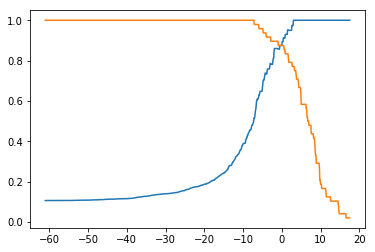

In [30]:
# 下面用 for 循环拿到所有的阈值，绘制成图：
precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype = 'int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))
    
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.show()

## Precision-Recall 曲线

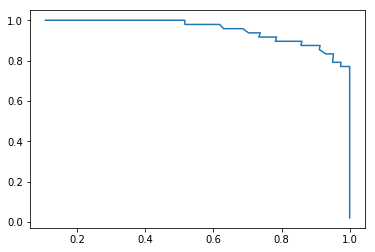

In [31]:
# 将 Precision 和 Recall 分别放在坐标轴的 x 和 y 轴上
# 可以清晰的观察到两者的关系：
plt.plot(precisions, recalls)
plt.show()

In [32]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [33]:
precisions.shape

(93,)

In [34]:
recalls.shape

(93,)

In [35]:
thresholds.shape

(92,)

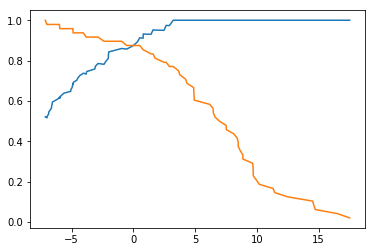

In [36]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])
plt.show()

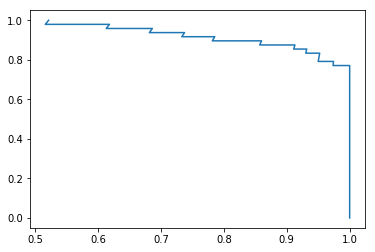

In [37]:
plt.plot(precisions, recalls)
plt.show()
# 对比前面的图会发现这里只是前面的中间部分，
# 是因为 precision_recall_curve 选择了它认为最重要的数据。